### I have cleaned the data using R and now im looking to use pandas to create exploritory figures.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
proteomics_ack = pd.read_csv("data/proteomics_ack.csv")

In [4]:
print("proteomics_ack shape is ", proteomics_ack.shape)
print()

print(proteomics_ack.head())
print()

print(proteomics_ack.describe())

proteomics_ack shape is  (2018, 102)

   Unnamed: 0  Index  Index in Detail  Sample2vSample1      Sample3vSample1  \
0           1      2                3         1.700848   1.7805019863310996   
1           2      3                4        -1.503863    1.306579795240185   
2           3      4                8         1.958863   2.2352086192147267   
3           4      5                9        -1.484604  -1.1893749153277526   
4           5      6               11         1.419223    1.519303918615512   

   Sample3vSample2  Max Abundance  Max % CV Gene Name Protein Name  ...  \
0        -1.043919   4.647579e+07  0.328817      Wdr1         WDR1  ...   
1         1.798046   3.058275e+07  0.804888      Wdr1         WDR1  ...   
2         1.044168   1.252594e+07  0.414742      Wdr1         WDR1  ...   
3         1.142216   6.066070e+07  0.208634      Wdr1         WDR1  ...   
4        -1.020821   2.846943e+06  0.600069      Wdr1         WDR1  ...   

  Run 1 Sample 2 : Sample 1...92 Run

In [5]:
proteomics_ack['Gene Name'] = proteomics_ack['Gene Name'].str.split(';').str[0]
proteomics_ack['Protein Name'] = proteomics_ack['Protein Name'].str.split(';').str[0]

### Plotting the frequency or distribution of the counts in detail or number of fragments.

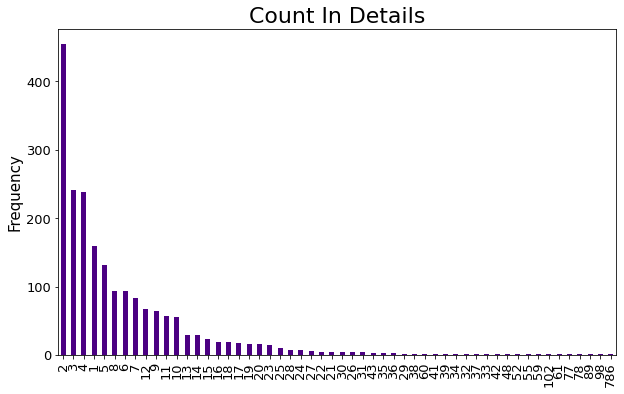

In [6]:
plt.rcParams["figure.figsize"] = [10, 6]

proteomics_ack = proteomics_ack.replace(np.nan,0)

ax = proteomics_ack['Count In Details'].value_counts().plot(kind='bar', color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Count In Details", fontsize=22)
ax.set_ylabel("Frequency", fontsize=15);
plt.show()

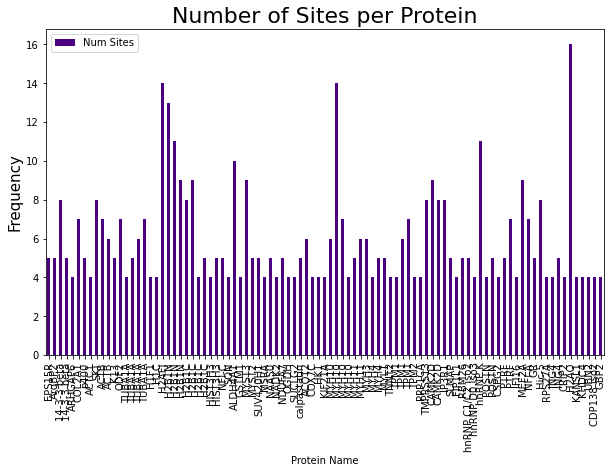

,Num Sites
Protein Name,
EPS15R,5
ArgBP2,5
14-3-3 beta,8
14-3-3 beta,5
ARHGAP6,4
...,...
KANSL1,4
KHDC4,4
UBN2,4


In [7]:
proteomics_ack['Num Sites'] = proteomics_ack['Site'].str.split(';').str.len()
df = proteomics_ack[['Num Sites', 'Protein Name']].copy().drop_duplicates()

# Filtering out the protein with three or less sites
df = df[df['Num Sites'] > 3]
df = df.set_index('Protein Name')


ax = df.plot(kind='bar', color="indigo", fontsize=10, linewidth= 3)
ax.set_alpha(0.8)
ax.set_title("Number of Sites per Protein", fontsize=22)
ax.set_ylabel("Frequency", fontsize=15);
ax.set_xticklabels
plt.show()


df
